<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/01_Generalized_Linear_Models/02-01-02-glm-logistic-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2. Logistic Regression (Binary Classification)


This tutorial will focus on implementing a logistic regression model in R, a powerful open-source statistical software that provides numerous functions for easily fitting, interpreting, and visualizing these models. We will begin by reviewing the fundamentals of logistic models, which include understanding their structure, key components, and the types of data they are best suited to handle.

My approach will be step-by-step, starting with constructing a logistic model using synthetic data without relying on any built-in R packages. We will then demonstrate how to fit a logistic model using R's built-in functions (`glm`), interpret the model outputs, per and visualize the results using different R packages.

## Overview

**Logistic Regression** is a statistical and machine learning algorithm used for **binary classification** tasks—predicting the probability that an instance belongs to one of two classes (e.g., spam vs. not spam, disease vs. no disease). Despite its name, logistic regression is a **classification algorithm**, not a regression technique.

It models the relationship between a set of independent variables (features) and a binary dependent variable by estimating probabilities using a **logistic function** (also known as the **sigmoid function**).

## Key Components

### Sigmoid (Logistic) Function

The core of logistic regression is the **sigmoid function**, which maps any real-valued number into a value between 0 and 1, making it suitable for probability estimation.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- $ z $ is the linear combination of input features and weights.
- $ \sigma(z) $ outputs a value in $ (0, 1) $, interpreted as the probability of the positive class.


### Linear Combination (Logit)

The input to the sigmoid function is a linear combination of the features and their corresponding weights (parameters):

$$
z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \theta^T X
$$

Where:

- $ \theta_0 $ is the **intercept (bias)**.
- $ \theta_1, \theta_2, \dots, \theta_n $ are the **coefficients (weights)**.
- $ x_1, x_2, \dots, x_n $ are the **input features**.
- $ X $ is the feature vector.
- $ \theta $ is the parameter vector.


###  Hypothesis Function

The hypothesis in logistic regression gives the predicted probability that the output $ y = 1 $ given input $ X $:

$$
h_\theta(X) = P(y = 1 \mid X; \theta) = \sigma(\theta^T X) = \frac{1}{1 + e^{-\theta^T X}}
$$

The predicted class is determined by a threshold (typically 0.5):

$$
\hat{y} =
\begin{cases}
1 & \text{if } h_\theta(X) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

### Log-Odds (Logit)

The log-odds of the probability is linear in the inputs:

$$
\log\left(\frac{P(y=1 \mid X)}{P(y=0 \mid X)}\right) = \theta^T X
$$

This shows that logistic regression models the **log-odds** of the outcome as a linear function of the input features.


###  Cost Function (Log Loss)

Unlike linear regression, logistic regression uses **log loss** (cross-entropy loss) because the mean squared error is non-convex in this context.

The cost for a single training example is:

$$
J(\theta) =
\begin{cases}
-\log(h_\theta(X)) & \text{if } y = 1 \\
-\log(1 - h_\theta(X)) & \text{if } y = 0
\end{cases}
$$

This can be combined into a single expression:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(X^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(X^{(i)})) \right]
$$

Where:

- $ m $ is the number of training examples.
- $ y^{(i)} $ is the true label of the $ i $-th example.
- $ h_\theta(X^{(i)}) $ is the predicted probability.

### Optimization (Parameter Estimation)

The goal is to **minimize the cost function** $ J(\theta) $ with respect to $ \theta $. Since there is no closed-form solution, optimization algorithms like **Gradient Descent** are used.

#### Gradient of the Cost Function:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(X^{(i)}) - y^{(i)}) x_j^{(i)}
$$

#### Parameter Update Rule (Gradient Descent):

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Where:

- $ \alpha $ is the **learning rate**.
- The update is repeated until convergence.

### How It Works (Step-by-Step)


1. **Input**: A dataset with features $ X $ and binary labels $ y \in \{0, 1\} $.
2. **Initialize**: Set initial values for parameters $ \theta $ (often zeros or small random values).
3. **Compute Hypothesis**: For each input, compute $ h_\theta(X) = \sigma(\theta^T X) $.
4. **Compute Cost**: Use log loss to evaluate model performance.
5. **Update Parameters**: Use gradient descent (or other optimizers) to minimize cost.
6. **Repeat**: Iterate until convergence.
7. **Predict**: For new data, compute $ h_\theta(X) $ and apply threshold (e.g., 0.5) to classify.

### Applications

Logistic regression is widely used in various domains due to its simplicity, interpretability, and efficiency:

- **Medical Diagnosis**: Predicting presence or absence of a disease.
- **Credit Scoring**: Classifying loan applicants as high or low risk.
- **Marketing**: Predicting whether a customer will respond to a campaign.
- **Spam Detection**: Classifying emails as spam or not spam.
- **Image Classification**: Simple binary image classification tasks.
- **Natural Language Processing (NLP)**: Sentiment analysis (positive/negative).

### Advantages
- Simple and interpretable (coefficients indicate feature importance).
- Efficient to train and predict.
- Outputs probabilities, not just classes.
- Works well with small datasets.

### Limitations

- Assumes a linear decision boundary.
- Sensitive to outliers.
- Can underperform with complex, non-linear relationships.
- Requires feature independence (multicollinearity can affect stability).

## Setup R in Python Runtype

### Install rpy2

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314973 sha256=b9aceabc56ea6347c0c56290d33dace979e67146e9fa85ee7f54fbc8288ff1aa
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Logistic Model  from Scratch

In this section, we will demonstrate how to build a logistic regression model in R without using any external packages. We will start by generating synthetic data, then proceed to fit the model, compute summary statistics, and validate the model's performance through k-fold cross-validation. Below are the step-by-step instructions and explanations of the underlying mathematics involved.


### Generate Synthetic Data

We need to create a dataset with:

-   One binary response variable (contaminated: Yes = 1, No = 0).

-   Four linear predictor variables (we'll call them x1, x2, x3, and x4).

-   One categorical variable with two levels (region: highland or lowland).

In [ ]:
%%R
# Set seed for reproducibility
set.seed(42)

# Generate the covariates
n <- 100
x1 <- rnorm(n, mean = 0, sd = 1)
x2 <- rnorm(n, mean = 0, sd = 1)
x3 <- rnorm(n, mean = 0, sd = 1)
x4 <- rnorm(n, mean = 0, sd = 1)

# Generate the categorical variable
region <- factor(sample(c("highland", "lowland"), n, replace = TRUE))

# Define coefficients
beta_0 <- -1
beta_1 <- 0.5
beta_2 <- -0.3
beta_3 <- 0.2
beta_4 <- 0.1
beta_5 <- 0.7 # Assume this for highland vs lowland effect

# Calculate linear predictor
log_odds <- beta_0 + beta_1 * x1 + beta_2 * x2 + beta_3 * x3 + beta_4 * x4 + beta_5 * (region == "highland")

# Convert to probability using the logistic function
probability <- exp(log_odds) / (1 + exp(log_odds))

# Generate binary response based on probability
contaminated <- rbinom(n, 1, probability)

# Combine into a data frame
data <- data.frame(contaminated = contaminated, x1 = x1, x2 = x2, x3 = x3, x4 = x4, region = region)
head(data)



  contaminated         x1         x2         x3           x4   region
1            0  1.3709584  1.2009654 -2.0009292 -0.004620768  lowland
2            0 -0.5646982  1.0447511  0.3337772  0.760242168  lowland
3            0  0.3631284 -1.0032086  1.1713251  0.038990913  lowland
4            0  0.6328626  1.8484819  2.0595392  0.735072142 highland
5            0  0.4042683 -0.6667734 -1.3768616 -0.146472627  lowland
6            1 -0.1061245  0.1055138 -1.1508556 -0.057887335  lowland


### Define the Log-Likelihood Function

To fit a logistic regression without using `glm()` or any packages, we need to implement `maximum likelihood estimation (MLE)` from scratch. This involves defining the likelihood function for logistic regression and then using numerical optimization to estimate the coefficients.

Here's how to do it in R:

The probability that an observation $Y_i = 1$ (contaminated = Yes) given predictor variables $X_i$ is given by:

$$ P(Y_i = 1 | X_i) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \beta_4 x_{i4} + \beta_5 \text{region}_i)}} $$ The log-likelihood function for logistic regression, which we want to maximize, is:

$$ \text{log-likelihood} = \sum_{i=1}^n \left( Y_i \cdot \log(P(Y_i = 1 | X_i)) + (1 - Y_i) \cdot \log(1 - P(Y_i = 1 | X_i)) \right) $$

Let's write this in R, where `params` will represent the vector of coefficients $\beta$.

In [ ]:
%%R
# Define the log-likelihood function
log_likelihood <- function(params, data) {
  # Extract coefficients
  beta_0 <- params[1]
  beta_1 <- params[2]
  beta_2 <- params[3]
  beta_3 <- params[4]
  beta_4 <- params[5]
  beta_5 <- params[6]

  # Calculate linear predictor (log-odds)
  log_odds <- beta_0 + beta_1 * data$x1 + beta_2 * data$x2 +
              beta_3 * data$x3 + beta_4 * data$x4 +
              beta_5 * (data$region == "highland")

  # Calculate probability using the logistic function
  probability <- 1 / (1 + exp(-log_odds))

  # Calculate the log-likelihood
  ll <- sum(data$contaminated * log(probability) +
            (1 - data$contaminated) * log(1 - probability))
  return(-ll)  # Return negative log-likelihood for minimization
}

### Optimize the Log-Likelihood Function

We use `optim()` to find the parameter values that maximize the likelihood (minimizes the negative log-likelihood).

In [ ]:
%%R
# Initial guesses for coefficients
initial_params <- rep(0, 6)

# Optimize the log-likelihood function
fit <- optim(par = initial_params, fn = log_likelihood, data = data, method = "BFGS")

# Extract the estimated coefficients
estimated_params <- fit$par
estimated_params

[1] -1.1717235  0.4808036 -0.4012342 -0.0907871  0.1267498  0.6483121


### Interpret the Results

The `estimated_params` vector contains our estimated coefficients ($\beta_0, \beta_1, \ldots, \beta_5$), which can be interpreted as follows: - Each coefficient represents the effect of the corresponding predictor on the log-odds of contamination. - For example, if `estimated_params[2]` (the estimate for ($\beta_1$)) is positive, an increase in `x1` increases the log-odds of contamination, and vice versa.




### Calculate Summary Statistics of the Model

To calculate standard errors, we can approximate the Hessian matrix (the matrix of second derivatives of the log-likelihood function), which `optim()` provides if we set `hessian = TRUE`. The inverse of the Hessian gives the variance-covariance matrix of the estimates.

In [ ]:
%%R
# Re-run the optimization to get Hessian matrix
fit <- optim(par = initial_params, fn = log_likelihood, data = data, method = "BFGS", hessian = TRUE)

# Extract standard errors from the Hessian matrix
vcov_matrix <- solve(fit$hessian)
standard_errors <- sqrt(diag(vcov_matrix))
standard_errors

[1] 0.3427831 0.2338899 0.2647261 0.2196759 0.2555353 0.4566046


To summarize the results with estimated coefficients and standard errors:

In [ ]:
%%R
# Combine results in a table
summary_table <- data.frame(
  Coefficient = estimated_params,
  Std_Error = standard_errors,
  Z_value = estimated_params / standard_errors,
  p_value = 2 * (1 - pnorm(abs(estimated_params / standard_errors)))
)

# Display summary table
print(summary_table)

  Coefficient Std_Error    Z_value      p_value
1  -1.1717235 0.3427831 -3.4182654 0.0006302161
2   0.4808036 0.2338899  2.0556834 0.0398130447
3  -0.4012342 0.2647261 -1.5156579 0.1296058904
4  -0.0907871 0.2196759 -0.4132774 0.6794033730
5   0.1267498 0.2555353  0.4960168 0.6198825522
6   0.6483121 0.4566046  1.4198545 0.1556500395


This table gives:

- **Coefficient**: The estimated ($\beta$) values.

- **Std. Error**: The standard error for each coefficient.

- **Z-value**: Computed as $\text{Coefficient} / \text{Std. Error}$.

- **p-value**: The significance of each coefficient’s effect, testing the null hypothesis that each $\beta$ is zero.


### Odds Ratio (OR)

The odds ratio is a measure commonly used in logistic regression, to quantify the strength of association between two events. It represents the odds of an event occurring in one group compared to the odds of it occurring in another group. The odds ratio is calculated as the exponentiated coefficient of a predictor variable.

The odds ratio helps us understand how a one-unit increase in a predictor variable affects the odds of the outcome. Here’s how to interpret it:

-   OR = 1: The predictor does not change the odds of the outcome (no effect).

-   OR \> 1: The predictor increases the odds of the outcome. For instance, if OR = 1.5, a one-unit increase in the predictor increases the odds of the outcome by 50%.

-   OR \< 1: The predictor decreases the odds of the outcome. For example, if OR = 0.7, a one-unit increase in the predictor decreases the odds of the outcome by 30%.

In [ ]:
%%R
odd.ratio<-exp(estimated_params[2:6])
odd.ratio

[1] 1.6173736 0.6694933 0.9132121 1.1351330 1.9123104


### Model Performance

Evaluating the performance of a logistic regression model involves several metrics and techniques to understand how well the model predicts the outcome variable (e.g., contaminated vs. not contaminated). Here’s a detailed overview of the key evaluation metrics and methods commonly used in this context:

#### Confusion Matrix

A confusion matrix is a simple yet powerful tool for evaluating the performance of a classification model. It provides a summary of prediction results on a classification problem. The confusion matrix summarizes:

- **True Positives (TP)**: Correctly predicted positive instances.
- **True Negatives (TN)**: Correctly predicted negative instances.
- **False Positives (FP)**: Incorrectly predicted positive instances (Type I error).
- **False Negatives (FN)**: Incorrectly predicted negative instances (Type II error).

**Confusion Matrix Layout**:

|               | Actual Positive (1) | Actual Negative (0) |
|---------------|---------------------|---------------------|
| Predicted Positive (1) | TP                  | FP                  |
| Predicted Negative (0) | FN                  | TN                  |

In [ ]:
%%R
#Step 1: Compute Predicted Probabilitie
# Use estimated coefficients to calculate predicted probabilities
predicted_log_odds <- estimated_params[1] +
                      estimated_params[2] * data$x1 +
                      estimated_params[3] * data$x2 +
                      estimated_params[4] * data$x3 +
                      estimated_params[5] * data$x4 +
                      estimated_params[6] * (data$region == "highland")

# Convert log-odds to probability
predicted_probabilities <- 1 / (1 + exp(-predicted_log_odds))

#Step 2: Classify Predictions
# Set threshold and classify as 1 if probability > 0.5, else 0
predicted_class <- ifelse(predicted_probabilities > 0.5, 1, 0)
#Step 3: Create the Confusion Matrix
#The confusion matrix compares the actual values of contaminated with the predicted classifications (predicted_class).
actual_class <- data$contaminated
confusion_matrix <- table(Predicted = predicted_class, Actual = actual_class)
confusion_matrix

         Actual
Predicted  0  1
        0 61 23
        1  6 10


#### Performance Metrics

From the confusion matrix, several performance metrics can be derived:

- ***Accuracy***: The proportion of total correct predictions.
  
  $$   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- ***Precision*** (Positive Predictive Value): The proportion of predicted positives that are actual positives.
  
  $$   \text{Precision} = \frac{TP}{TP + FP} $$

 - ***Recall*** (Sensitivity or True Positive Rate): The proportion of actual positives that are correctly predicted.
  
  $$ \text{Recall} = \frac{TP}{TP + FN} $$


- ***Specificity*** (True Negative Rate): The proportion of actual negatives that are correctly predicted.
  
  $$   \text{Specificity} = \frac{TN}{TN + FP} $$

- ***F1 Score***: The harmonic mean of precision and recall, useful when dealing with imbalanced classes.
  
  $$ \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [ ]:
%%R
# define variables
TP <- confusion_matrix[2, 2]
TN <- confusion_matrix[1, 1]
FP <- confusion_matrix[2, 1]
FN <- confusion_matrix[1, 2]

# accuracy
accuracy <- (TP + TN) / sum(confusion_matrix)

# precision
precision <- TP / (TP + FP)

# Recall
recall <- TP / (TP + FN)

# specificity
specificity <- TN / (TN + FP)

# f1_score
f1_score <- 2 * (precision * recall) / (precision + recall)

# Print the results
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("Specificity:", specificity, "\n")
cat("F1 Score:", f1_score, "\n")

Accuracy: 0.71 
Precision: 0.625 
Recall: 0.3030303 
Specificity: 0.9104478 
F1 Score: 0.4081633 


#### Receiver Operating Characteristic (ROC) Curve and AUC

The ROC curve is an important tool used in evaluating the performance of a binary classification model. It is a graphical plot that illustrates how well the model can distinguish between positive and negative classes at different threshold settings. The curve displays the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the threshold for classification changes. The true positive rate measures the proportion of actual positive instances that are correctly identified by the model, while the false positive rate measures the proportion of actual negative instances that are incorrectly classified as positive by the model. By analyzing the ROC curve, one can determine the optimal threshold setting that maximizes the true positive rate and minimizes the false positive rate, thereby improving the overall accuracy of the classification model.

-   **True Positive Rate (TPR)**: The y-axis represents the true positive rate (sensitivity).
-   **False Positive Rate (FPR)**: The x-axis represents the false positive rate.

A typical ROC appears as a line that starts at the bottom left corner (0, 0) and extends towards the top right corner (1, 1). If the curve is closer to the top-left corner, it indicates better performance of the model. A diagonal line from (0, 0) to (1, 1) on the ROC curve represents the performance of a random classifier. A model with perfect discrimination will have an ROC curve passing through the top-left corner, indicating a true positive rate of 1 (sensitivity) and a false positive rate of 0 (specificity). The area under the ROC curve (AUC-ROC) is a widely used summary statistic for quantifying the performance of a classification model. AUC-ROC ranges from 0 to 1, with higher values indicating better discrimination. An AUC-ROC of 0.5 suggests that the model performs no better than random guessing, while an AUC-ROC of 1 indicates perfect classification. To summarize, the ROC curve provides a clear visualization of a classification model's performance across different threshold settings. This allows users to select an appropriate threshold based on their specific needs for sensitivity and specificity.

The Area Under the Curve (AUC) quantifies the overall ability of the model to discriminate between the positive and negative classes:


-   **AUC = 1**: Perfect discrimination.
-   **AUC = 0.5**: No discrimination (random guessing).

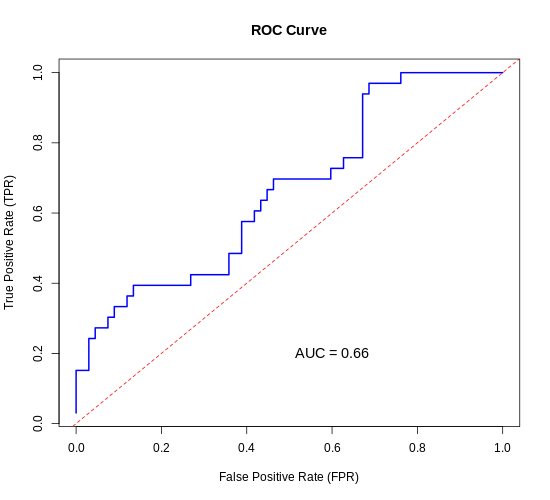

In [ ]:
%%R -h 500 -w 550

# Calculate and plot ROC Curve
roc_data <- data.frame(probability = predicted_probabilities, actual = actual_class)
roc_data <- roc_data[order(-roc_data$probability), ]
TPR <- cumsum(roc_data$actual) / sum(roc_data$actual)
FPR <- cumsum(1 - roc_data$actual) / sum(1 - roc_data$actual)
AUC <- sum((FPR[-1] - FPR[-length(FPR)]) * (TPR[-1] + TPR[-length(TPR)]) / 2)

# Plot ROC Curve
plot(FPR, TPR, type = 'l', col = 'blue', lwd = 2,
     xlab = 'False Positive Rate (FPR)',
     ylab = 'True Positive Rate (TPR)',
     main = 'ROC Curve')
abline(a = 0, b = 1, col = 'red', lty = 2)
text(0.6, 0.2, paste("AUC =", round(AUC, 2)), col = 'black', cex = 1.2)


#### Log-Likelihood and Pseudo-R²

-   ***Log-Likelihood***: A measure of how well the model fits the data. Higher values indicate a better fit.

-   ***Pseudo-R²***: Various metrics (like McFadden’s R², Cox & Snell R²) can be used to measure the goodness of fit for logistic regression models.

In [ ]:
%%R
# Function to calculate Log-Likelihood
log_likelihood_value <- function(params, data) {
  beta_0 <- params[1]
  beta_1 <- params[2]
  beta_2 <- params[3]
  beta_3 <- params[4]
  beta_4 <- params[5]
  beta_5 <- params[6]

  # Linear predictor
  log_odds <- beta_0 + beta_1 * data$x1 + beta_2 * data$x2 +
              beta_3 * data$x3 + beta_4 * data$x4 +
              beta_5 * (data$region == "highland")

  # Predicted probabilities
  probability <- 1 / (1 + exp(-log_odds))

  # Log-Likelihood calculation
  ll <- sum(data$contaminated * log(probability) +
            (1 - data$contaminated) * log(1 - probability))

  return(ll)  # Return Log-Likelihood
}

# Calculate the log-likelihood using the estimated parameters
ll_value <- log_likelihood_value(estimated_params, data)

# Function to calculate Log-Likelihood of null model
null_model_ll <- function(data) {
  p_null <- mean(data$contaminated)  # Proportion of 1s
  ll_null <- sum(data$contaminated * log(p_null) +
                 (1 - data$contaminated) * log(1 - p_null))
  return(ll_null)  # Return Log-Likelihood of null model
}

# Calculate Log-Likelihood for null model
ll_null_value <- null_model_ll(data)

# Calculate Pseudo-R²
pseudo_r2 <- 1 - (ll_value / ll_null_value)

# Output the results
cat("Log-Likelihood of the model:", ll_value, "\n")
cat("Log-Likelihood of the null model:", ll_null_value, "\n")
cat("Pseudo-R²:", pseudo_r2, "\n")

Log-Likelihood of the model: -58.56622 
Log-Likelihood of the null model: -63.41786 
Pseudo-R²: 0.07650273 


#### Cross-Validation

To assess how the model generalizes to an independent dataset, use cross-validation techniques like $k-fold$ cross-validation. This involves splitting the data into $k$ subsets, training the model on $k-1$ subsets, and testing it on the remaining subset. This process is repeated $k$ times, and the performance metrics are averaged.

In [ ]:
%%R
# Set seed for reproducibility
set.seed(42)

# k-Fold Cross-Validation
k <- 5  # Number of folds
folds <- cut(seq(1, n), breaks = k, labels = FALSE)  # Create folds
metrics <- data.frame(accuracy = numeric(k), precision = numeric(k), recall = numeric(k), f1_score = numeric(k))

for (i in 1:k) {
  # Split data into training and validation sets
  validation_indices <- which(folds == i, arr.ind = TRUE)
  validation_set <- data[validation_indices, ]
  training_set <- data[-validation_indices, ]

  # Fit the logistic regression model without using glm
  log_likelihood <- function(params, data) {
    beta_0 <- params[1]
    beta_1 <- params[2]
    beta_2 <- params[3]
    beta_3 <- params[4]
    beta_4 <- params[5]
    beta_5 <- params[6]
    log_odds <- beta_0 + beta_1 * data$x1 + beta_2 * data$x2 + beta_3 * data$x3 + beta_4 * data$x4 + beta_5 * (data$region == "highland")
    probability <- 1 / (1 + exp(-log_odds))
    ll <- sum(data$contaminated * log(probability) + (1 - data$contaminated) * log(1 - probability))
    return(-ll)
  }

  initial_params <- rep(0, 6)
  fit <- optim(par = initial_params, fn = log_likelihood, data = training_set, method = "BFGS", hessian = TRUE)
  estimated_params <- fit$par

  # Predict on the validation set
  predicted_log_odds <- estimated_params[1] + estimated_params[2] * validation_set$x1 +
                        estimated_params[3] * validation_set$x2 +
                        estimated_params[4] * validation_set$x3 +
                        estimated_params[5] * validation_set$x4 +
                        estimated_params[6] * (validation_set$region == "highland")
  predicted_probabilities <- 1 / (1 + exp(-predicted_log_odds))
  predicted_class <- ifelse(predicted_probabilities > 0.5, 1, 0)

  # Create confusion matrix for the current fold
  actual_class <- validation_set$contaminated
  confusion_matrix <- table(Predicted = predicted_class, Actual = actual_class)

  # Calculate performance metrics
  TP <- confusion_matrix[2, 2]  # True Positives
  TN <- confusion_matrix[1, 1]  # True Negatives
  FP <- confusion_matrix[2, 1]  # False Positives
  FN <- confusion_matrix[1, 2]  # False Negatives

  accuracy <- (TP + TN) / sum(confusion_matrix)
  precision <- ifelse(TP + FP == 0, 0, TP / (TP + FP))
  recall <- ifelse(TP + FN == 0, 0, TP / (TP + FN))
  f1_score <- ifelse(precision + recall == 0, 0, 2 * (precision * recall) / (precision + recall))

  # Store the metrics for the current fold
  metrics[i, ] <- c(accuracy, precision, recall, f1_score)
}

# Calculate the average metrics across all folds
average_metrics <- colMeans(metrics)

# Print the results
cat("Average Accuracy:", average_metrics[1], "\n")
cat("Average Precision:", average_metrics[2], "\n")
cat("Average Recall:", average_metrics[3], "\n")
cat("Average F1 Score:", average_metrics[4], "\n")

Average Accuracy: 0.67 
Average Precision: 0.5666667 
Average Recall: 0.3304762 
Average F1 Score: 0.3559019 


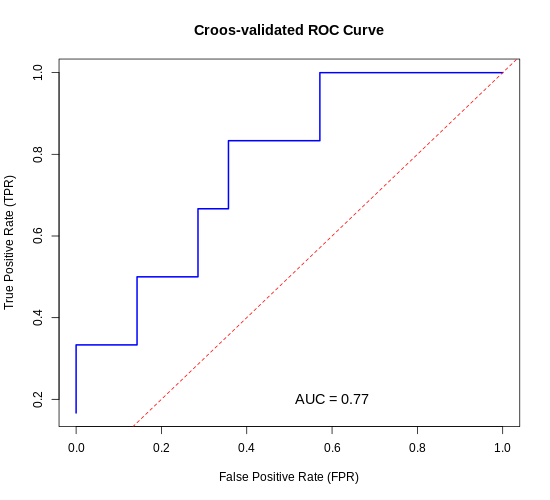

In [ ]:
%%R -h 500 -w 550
# Plot the ROC Curve
roc_data <- data.frame(probability = predicted_class, actual = actual_class)
roc_data <- roc_data[order(-roc_data$probability), ]
TPR <- cumsum(roc_data$actual) / sum(roc_data$actual)
FPR <- cumsum(1 - roc_data$actual) / sum(1 - roc_data$actual)
AUC <- sum((FPR[-1] - FPR[-length(FPR)]) * (TPR[-1] + TPR[-length(TPR)]) / 2)


plot(FPR, TPR, type = 'l', col = 'blue', lwd = 2,
     xlab = 'False Positive Rate (FPR)',
     ylab = 'True Positive Rate (TPR)',
     main = 'Croos-validated ROC Curve')
abline(a = 0, b = 1, col = 'red', lty = 2)
text(0.6, 0.2, paste("AUC =", round(AUC, 2)), col = 'black', cex = 1.2)

## Logistic Model in R

The `glm()` function in R is commonly used to fit generalized linear models, including logistic regression. Here’s a guide on how to fit a logistic regression model with `glm()`.

### Check and Install required R Packages

Before fitting the logistic model, we need to install and load the necessary R packages. The packages we will use include `tidyverse`, `boot`, `margins`, `ggeffects`, `performance`, `sjPlot`, `patchwork`, `gt`, `gtsummary`, `jtools`, `report`, `Metrics`, `metrica`, `pROC`, and `ROCR`.




In [ ]:
%%R
# packages list
packages <- c(
  "tidyverse",   # Includes readr, dplyr, ggplot2, etc.
  "plyr",
  "rstatix",
  "boot",
  "margins",
  "marginaleffects",
  "ggeffects",
  "performance",
  "ggpmisc",
  "sjPlot",
  "patchwork",
  "gt",
  "gtsummary",
  "jtools",
  "report",
  "Metrics",
  "pROC",
	"ROCR"
  )



In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2



      tidyverse            plyr         rstatix            boot         margins 
           TRUE            TRUE            TRUE            TRUE            TRUE 
marginaleffects       ggeffects     performance         ggpmisc          sjPlot 
           TRUE            TRUE            TRUE            TRUE            TRUE 
      patchwork              gt       gtsummary          jtools          report 
           TRUE            TRUE            TRUE            TRUE            TRUE 
        Metrics            pROC            ROCR 
           TRUE            TRUE            TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')

# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])


Successfully loaded packages:
 [1] "package:ROCR"            "package:pROC"           
 [3] "package:Metrics"         "package:report"         
 [5] "package:jtools"          "package:gtsummary"      
 [7] "package:gt"              "package:patchwork"      
 [9] "package:sjPlot"          "package:ggpmisc"        
[11] "package:ggpp"            "package:performance"    
[13] "package:ggeffects"       "package:marginaleffects"
[15] "package:margins"         "package:boot"           
[17] "package:rstatix"         "package:plyr"           
[19] "package:lubridate"       "package:forcats"        
[21] "package:stringr"         "package:dplyr"          
[23] "package:purrr"           "package:readr"          
[25] "package:tidyr"           "package:tibble"         
[27] "package:ggplot2"         "package:tidyverse"      
[29] "package:tools"           "package:stats"          
[31] "package:graphics"        "package:grDevices"      
[33] "package:utils"           "package:datasets"       
[

### Data

The **Pima Indians Diabetes Dataset** contains health measurements for 768 Pima Indian women from Arizona, used to predict whether a patient has **type 2 diabetes** (binary outcome: 1 = yes, 0 = no).  

**Features**:  
- Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age  

**Key Notes**:  

- All patients are female, ≥21 years old.  
- Zero values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI are likely **missing data** and should be handled.  
- Class distribution: ~65% non-diabetic, ~35% diabetic (mildly imbalanced).  

**Use**:  
Commonly used for teaching **binary classification**, logistic regression, and model evaluation (e.g., ROC, accuracy).  


**Source**: UCI Machine Learning Repository (publicly available).

In [ ]:
%%R
# Using a publicly available version from UCI repository
url <- "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
pima <- readr::read_csv(url, col_names = c("Pregnancies", "Glucose", "BloodPressure",
                                          "SkinThickness", "Insulin", "BMI",
                                          "DiabetesPedigreeFunction", "Age", "Outcome"))
glimpse(pima)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 768
Columns: 9
$ Pregnancies              <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, …
$ Glucose                  <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125…
$ BloodPressure            <dbl> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74…
$ SkinThickness            <dbl> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, …
$ Insulin                  <dbl> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, …
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2…
$ Age                      <dbl> 50, 31, 32, 21, 33, 30, 26, 29, 53

#### Data Processing

In [ ]:
%%R
# Convert Outcome to factor (0 = No, 1 = Yes)
pima$Outcome <- as.factor(ifelse(pima$Outcome == 1, "Yes", "No"))

# Handle missing values (replace 0s with NA for certain variables, then impute or filter)
pima$Glucose[pima$Glucose == 0] <- NA
pima$BloodPressure[pima$BloodPressure == 0] <- NA
pima$SkinThickness[pima$SkinThickness == 0] <- NA
pima$Insulin[pima$Insulin == 0] <- NA
pima$BMI[pima$BMI == 0] <- NA

# Remove rows with NA (alternatively, you could impute missing values)
pima <- na.omit(pima)

# Select and normalize numerical features
df <- pima %>%
  dplyr::select(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI,
                DiabetesPedigreeFunction, Age, Outcome) %>%
  dplyr::mutate_at(vars(-Outcome), ~(. - min(., na.rm = TRUE)) / (max(., na.rm = TRUE) - min(., na.rm = TRUE))) %>%
  glimpse()

Rows: 392
Columns: 9
$ Pregnancies              <dbl> 0.05882353, 0.00000000, 0.17647059, 0.1176470…
$ Glucose                  <dbl> 0.2323944, 0.5704225, 0.1549296, 0.9929577, 0…
$ BloodPressure            <dbl> 0.48837209, 0.18604651, 0.30232558, 0.5348837…
$ SkinThickness            <dbl> 0.28571429, 0.50000000, 0.44642857, 0.6785714…
$ Insulin                  <dbl> 0.09615385, 0.18509615, 0.08894231, 0.6358173…
$ BMI                      <dbl> 0.20245399, 0.50920245, 0.26175869, 0.2515337…
$ DiabetesPedigreeFunction <dbl> 0.03511777, 0.94346895, 0.06980728, 0.0312633…
$ Age                      <dbl> 0.00000000, 0.20000000, 0.08333333, 0.5333333…
$ Outcome                  <fct> No, Yes, Yes, Yes, Yes, Yes, Yes, No, Yes, No…


#### Box/Violine Plots

We can create a nice looking plots with results of `ANOVA` and `post-hocs tests on the same plot (directly on the boxplots). We will use `ggbetweenstats()` function of {ggstatsplot} package:

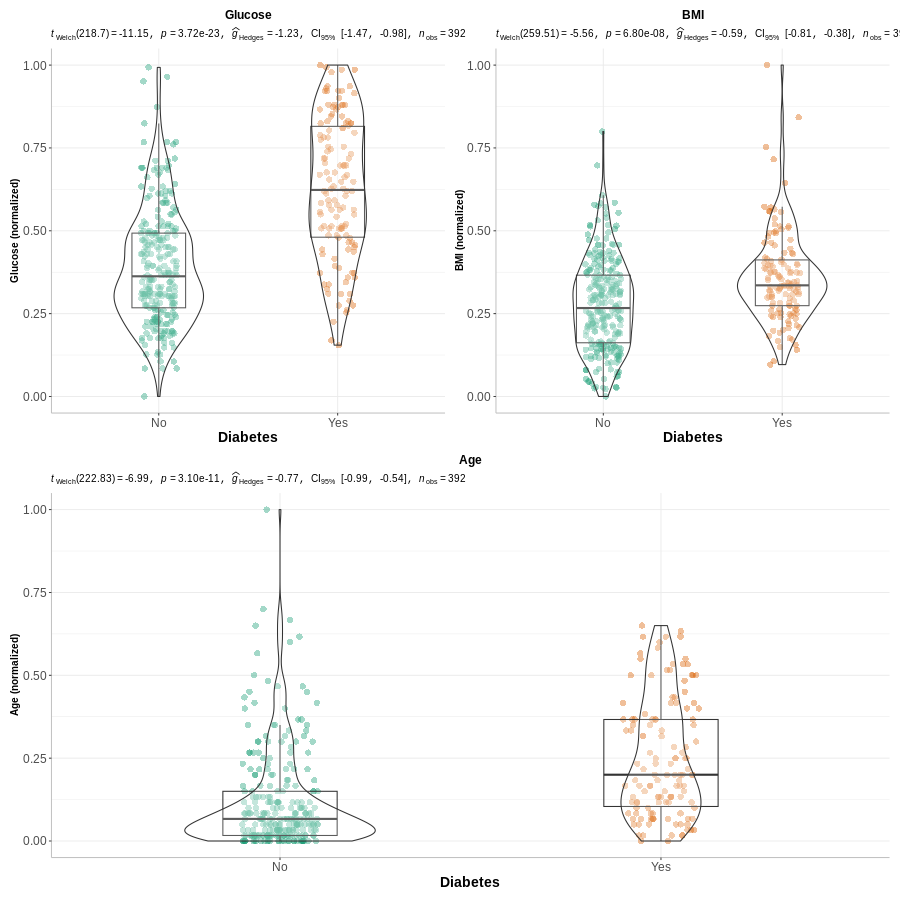

In [ ]:
%%R -w 900 -h 900 -u px
# Create boxplots for key predictors by diabetes status
p1 <- ggstatsplot::ggbetweenstats(
  data = df, x = Outcome, y = Glucose, ylab = "Glucose (normalized)", xlab = "Diabetes",
  type = "parametric", plot.type = "box", pairwise.comparisons = TRUE, pairwise.display = "significant",
  centrality.plotting = FALSE, bf.message = FALSE
) + ggtitle("Glucose") + theme(plot.title = element_text(hjust = 0.5), axis.line = element_line(colour = "gray"),
                               axis.title.x = element_text(size = 14), axis.text = element_text(size = 12))

p2 <- ggstatsplot::ggbetweenstats(
  data = df, x = Outcome, y = BMI, ylab = "BMI (normalized)", xlab = "Diabetes",
  type = "parametric", plot.type = "box", pairwise.comparisons = TRUE, pairwise.display = "significant",
  centrality.plotting = FALSE, bf.message = FALSE
) + ggtitle("BMI") + theme(plot.title = element_text(hjust = 0.5), axis.line = element_line(colour = "gray"),
                           axis.title.x = element_text(size = 14), axis.text = element_text(size = 12))

p3 <- ggstatsplot::ggbetweenstats(
  data = df, x = Outcome, y = Age, ylab = "Age (normalized)", xlab = "Diabetes",
  type = "parametric", plot.type = "box", pairwise.comparisons = TRUE, pairwise.display = "significant",
  centrality.plotting = FALSE, bf.message = FALSE
) + ggtitle("Age") + theme(plot.title = element_text(hjust = 0.5), axis.line = element_line(colour = "gray"),
                           axis.title.x = element_text(size = 14), axis.text = element_text(size = 12))

# Combine plots
(p1 | p2) / p3

#### Split Data




In [ ]:
%%R
set.seed(11076)
tr_prop <- 0.70
train <- plyr::ddply(df, .(Outcome), function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test <- plyr::ddply(df, .(Outcome), function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

# Check class distribution
print(prop.table(table(train$Outcome)))
print(prop.table(table(test$Outcome)))


       No       Yes 
0.6678832 0.3321168 

       No       Yes 
0.6694915 0.3305085 


Stratified random sampling is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

### Fit a Logistic Model

We will use **logistic regression** to predict probability of `outcome` based on of the selected features.  We will use `glm()` function with `family = binomial(link = "logit"))` for logistic regression. The `Outcome` variable will be used as a response variable, while all the other variables in the `train` will serve as predictors.


In [ ]:
%%R
### Fit Logistic Model
fit.logit <- glm(Outcome ~ ., data = train, family = binomial(link = "logit"))

### Model Summary

The `summary()` function provides a summary of the fitted GLM model, including coefficients, standard errors, t-values, and p-values, among other statistics. This summary can help you interpret the relationship between the predictors and the response variable.

In [ ]:
%%R
summary(fit.logit)


Call:
glm(formula = Outcome ~ ., family = binomial(link = "logit"), 
    data = train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -5.8788     0.8812  -6.672 2.53e-11 ***
Pregnancies                1.4495     1.1323   1.280   0.2005    
Glucose                    5.4672     0.9743   5.612 2.00e-08 ***
BloodPressure              0.4892     1.2458   0.393   0.6946    
SkinThickness              0.4643     1.1800   0.394   0.6939    
Insulin                   -0.4294     1.3388  -0.321   0.7484    
BMI                        3.6194     1.6273   2.224   0.0261 *  
DiabetesPedigreeFunction   1.9906     1.2430   1.601   0.1093    
Age                        1.5391     1.3873   1.109   0.2672    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 348.35  on 273  degrees of freedom
Residual deviance: 246.62  on 265  degrees of freedom
AIC

The summary output of GLM has several components that provide valuable insights into the model's performance. The summary includes information on the call, residuals, and coefficients, which are analogous to the summary of a model fit using the `lm()` function. However, the GLM summary differs from the `lm()` function in providing additional information about the dispersion parameter and deviance values.

The **intercept** represents the `log-odds` of the event happening when all independent variables are set to zero. In some cases, interpreting the intercept might not be meaningful, especially if setting all variables to zero is not a realistic or meaningful scenario in your context.

Each **slope coefficient** represents the change in the `log-odd`s of the event happening for a one-unit change in the corresponding independent variable holding all other variables constant. If the slope is positive, an increase in the corresponding independent variable is associated with an increase in the log-odds of the event happening. If the slope is negative, an increase in the corresponding independent variable is associated with a decrease in the log-odds of the event happening.

The **dispersion parameter** is a scaling factor that accounts for the variance of the response variable and is a crucial component of the GLM models. The deviance values are measures of the model's goodness of fit and are used to assess how well the model fits the observed data.

In cases where quasi-family is not used, the dispersion value is set to 1. This value indicates that the model's variance equals the mean and performs adequately. By understanding the summary output of a GLM model, we can make informed decisions about the model's performance and take the necessary steps to improve its accuracy.


`summ()` function of {jtools}  produce summary table of regression models:

In [ ]:
%%R
jtools::summ(fit.logit)

MODEL INFO:
Observations: 274
Dependent Variable: Outcome
Type: Generalized linear model
  Family: binomial 
  Link function: logit 

MODEL FIT:
χ²(8) = 101.72, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.43
Pseudo-R² (McFadden) = 0.29
AIC = 264.62, BIC = 297.14 

Standard errors:MLE
-------------------------------------------------------------
                                  Est.   S.E.   z val.      p
------------------------------ ------- ------ -------- ------
(Intercept)                      -5.88   0.88    -6.67   0.00
Pregnancies                       1.45   1.13     1.28   0.20
Glucose                           5.47   0.97     5.61   0.00
BloodPressure                     0.49   1.25     0.39   0.69
SkinThickness                     0.46   1.18     0.39   0.69
Insulin                          -0.43   1.34    -0.32   0.75
BMI                               3.62   1.63     2.22   0.03
DiabetesPedigreeFunction          1.99   1.24     1.60   0.11
Age                               1.54  

### Interpretation of Logistic Model

We can use `reoprt()` function of {report} package to further explain the `fit.glm` object.

In [ ]:
%%R
report::report(fit.logit)

We fitted a logistic model (estimated using ML) to predict Outcome with
Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI,
DiabetesPedigreeFunction and Age (formula: Outcome ~ Pregnancies + Glucose +
BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction +
Age). The model's explanatory power is substantial (Tjur's R2 = 0.35). The
model's intercept, corresponding to Pregnancies = 0, Glucose = 0, BloodPressure
= 0, SkinThickness = 0, Insulin = 0, BMI = 0, DiabetesPedigreeFunction = 0 and
Age = 0, is at -5.88 (95% CI [-7.71, -4.24], p < .001). Within this model:

  - The effect of Pregnancies is statistically non-significant and positive (beta
= 1.45, 95% CI [-0.75, 3.70], p = 0.200; Std. beta = 0.28, 95% CI [-0.14,
0.71])
  - The effect of Glucose is statistically significant and positive (beta = 5.47,
95% CI [3.63, 7.47], p < .001; Std. beta = 1.15, 95% CI [0.76, 1.57])
  - The effect of BloodPressure is statistically non-significant and positive
(beta =

### Model Performance

In [ ]:
%%R
performance::model_performance(fit.logit)

# Indices of model performance

AIC     |    AICc |     BIC | Tjur's R2 |  RMSE | Sigma | Log_loss | Score_log
------------------------------------------------------------------------------
264.624 | 265.306 | 297.142 |     0.350 | 0.379 | 1.000 |    0.450 |   -49.840

AIC     | Score_spherical |   PCP
---------------------------------
264.624 |           0.012 | 0.712


**`Tjur's R²`**, also known as Tjur's coefficient of discrimination, is a measure of discrimination or predictive accuracy for binary outcomes in logistic regression. It assesses how well the model distinguishes between the two categories of the dependent variable. Tjur's R² is defined as the difference in the average predicted probabilities of the two outcomes.

The formula for Tjur's R² is as follows:

$$ R^2_{Tjur} = P(Y=1|\hat{Y}=1) - P(Y=0|\hat{Y}=1) $$

Here:

-   $P(Y=1|\hat{Y}=1)$ is the probability of the actual outcome being 1 given that the predicted outcome is 1.

-   $P(Y=0|\hat{Y}=1)$ is the probability of the actual outcome being 0 given that the predicted outcome is 1.

Tjur's R² ranges from -1 to 1, where a higher value indicates better discrimination. A positive value suggests that the model is better at predicting the positive class, while a negative value suggests better prediction for the negative class.

In practice, Tjur's R² is not as commonly used as other metrics like the area under the ROC curve (AUC) or the Brier score, but it provides a measure of the practical significance of the logistic regression model in terms of discrimination. Keep in mind that the interpretation of Tjur's R² should be done in the context of the specific dataset and problem you are working on.

**`Log_loss`**: Logarithmic Loss (Log Loss), also known as cross-entropy loss, is a commonly utilized loss function in machine learning, particularly in classification problems. It measures the performance of a classification model that outputs a probability value ranging from 0 to 1. Due to its versatility and capability to handle prediction errors, Logarithmic Loss is often preferred over alternative loss functions. Its formulation is mathematically rigorous, and its implementation is straightforward, making it an essential tool for any machine learning practitioner.

The formula for Log Loss is:

$$ {Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] $$

Where:

\- $N$ is the number of samples in the dataset.

\- $y_i$ is the true label for the $i$ th sample (0 or 1 for binary classification, or one-hot encoded vectors for multiclass classification).

-   $p_i$ is the predicted probability that the $i$ th sample belongs to the positive class.

**`Score_spherical`**: A proper scoring rule is a mathematical function used to assess the accuracy of probabilistic predictions made by a model. It is called proper because it is designed to maximize the expected score when the model's predictions align with the actual probabilities of the outcomes.

**`PCP`**: Percentage of Correct Predictions (PCP), also known as accuracy, is a common evaluation metric for models with binary outcomes. It measures the proportion of correctly predicted instances out of the total number of instances.
:::

### Visualization of Model Assumptions

The package {performance} provides many functions to check model assumptions, like `check_collinearity()`, `check_normality()` or `check_heteroscedasticity()`. To get a comprehensive check, use `check_model()`.

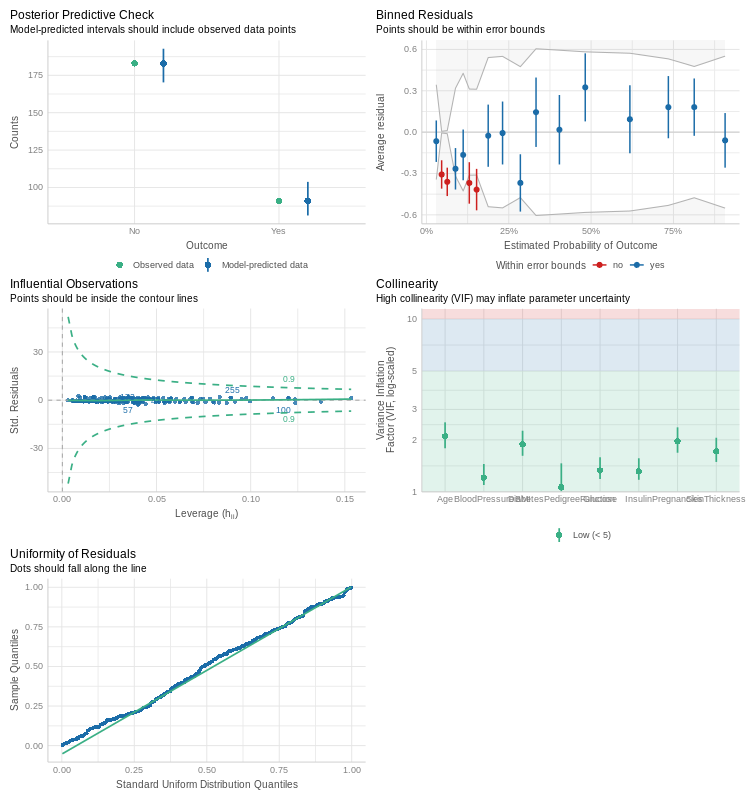

In [ ]:
%%R -w 750 -h 800 -u px
performance::check_model(fit.logit)

### Odds Ratio (OR)

In [ ]:
%%R
# Calculate odds ratios
odds_ratios <- exp(coef(fit.logit))
print(odds_ratios)

             (Intercept)              Pregnancies                  Glucose 
              0.00279802               4.26119461             236.80200555 
           BloodPressure            SkinThickness                  Insulin 
              1.63096394               1.59097580               0.65090517 
                     BMI DiabetesPedigreeFunction                      Age 
             37.31567057               7.31987131               4.66050949 



`plot_model()` function of {sjPlot} package creates plots the estimates from logistic model:

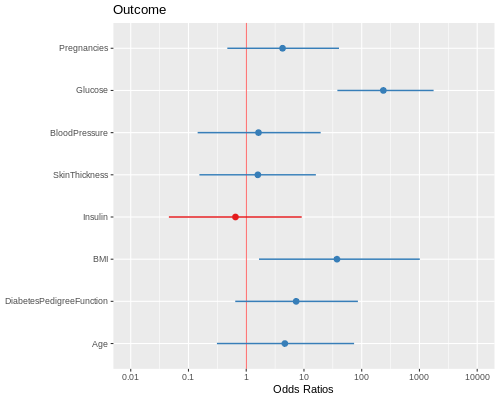

In [ ]:
%%R -h 400 -w 500 -u px
plot_model(fit.logit, vline.color = "red")

### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.

If we want the marginal effects for "BMI", you may use `margins()` function of {margins} package:

In [ ]:
%%R
margins::margins(fit.logit, variables = "BMI")

    BMI
 0.5236


we get the same marginal effect using `avg_slopes()` function from the {marginaleffects} package

In [ ]:
%%R
marginaleffects::avg_slopes(fit.logit, variables = "BMI")


 Estimate Std. Error    z Pr(>|z|)   S  2.5 % 97.5 %
    0.524      0.229 2.29    0.022 5.5 0.0755  0.972

Term: BMI
Type: response
Comparison: dY/dX



To calculate marginal effects and adjusted predictions, the `predict_response()` function is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.

In [ ]:
%%R
effect<-ggeffects::predict_response(fit.logit, "BMI", margin = "empirical")
effect

  plots.



# Average predicted probabilities of Outcome

 BMI | Predicted |     95% CI
-----------------------------
0.00 |      0.11 | 0.04, 0.27
0.20 |      0.21 | 0.14, 0.30
0.40 |      0.35 | 0.26, 0.45
0.60 |      0.52 | 0.30, 0.74
0.80 |      0.69 | 0.32, 0.92
1.00 |      0.82 | 0.34, 0.98



In [ ]:
%%R
effect$predicted[2] - effect$predicted[1]

[1] 0.09410717


{ggeffects} supports labelled data and the `plot()` method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.

  plots.



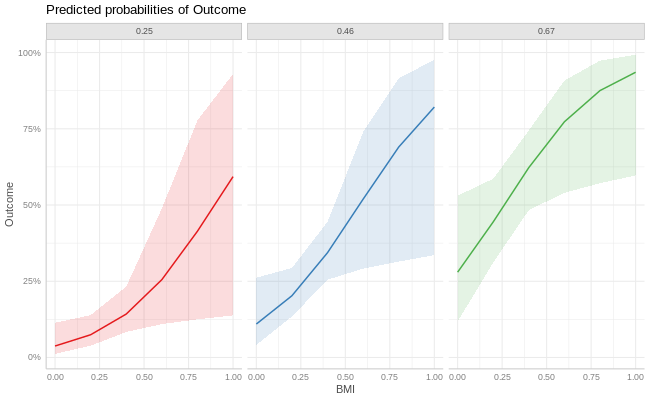

In [ ]:
%%R -w 650 -h 400 -u px
bmi.glucose <- predict_response(fit.logit, terms = c("BMI", "Glucose"))
plot(bmi.glucose , facets = TRUE)

In [ ]:
%%R
bmi.glucose.age<- predict_response(fit.logit, terms = c("BMI", "Glucose", "Age"))
bmi.glucose.age

  plots.



# Predicted probabilities of Outcome

Glucose: 0.25
Age: 0

 BMI | Predicted |     95% CI
-----------------------------
0.00 |      0.03 | 0.01, 0.10
0.20 |      0.06 | 0.03, 0.12
0.60 |      0.21 | 0.08, 0.44
1.00 |      0.53 | 0.11, 0.91

Glucose: 0.25
Age: 0.16

 BMI | Predicted |     95% CI
-----------------------------
0.00 |      0.04 | 0.01, 0.11
0.20 |      0.07 | 0.04, 0.14
0.60 |      0.25 | 0.11, 0.49
1.00 |      0.59 | 0.14, 0.93

Glucose: 0.25
Age: 0.33

 BMI | Predicted |     95% CI
-----------------------------
0.00 |      0.05 | 0.01, 0.15
0.20 |      0.09 | 0.04, 0.19
0.60 |      0.31 | 0.12, 0.59
1.00 |      0.65 | 0.16, 0.95

Glucose: 0.46
Age: 0

 BMI | Predicted |     95% CI
-----------------------------
0.00 |      0.09 | 0.03, 0.24
0.20 |      0.16 | 0.09, 0.28
0.60 |      0.46 | 0.23, 0.70
1.00 |      0.78 | 0.28, 0.97

Glucose: 0.46
Age: 0.16

 BMI | Predicted |     95% CI
-----------------------------
0.00 |      0.11 | 0.04, 0.26
0.20 |      0.20 | 0.13, 0.29

Not all rows are shown in the output. Use `print(..., n = Inf)` to show
  all rows.



`geom_smooth()` using formula = 'y ~ x'


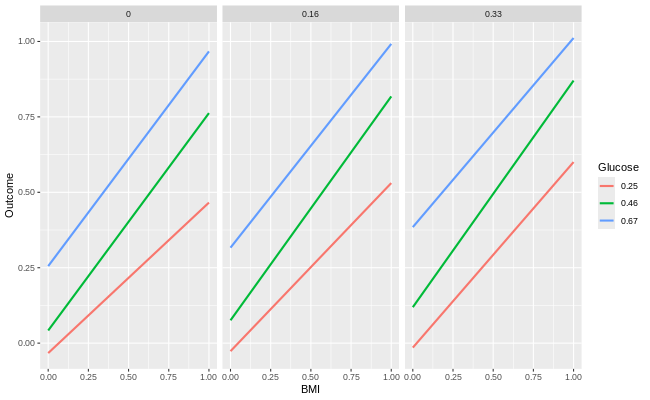

In [ ]:
%%R -w 650 -h 400 -u px
# select specific levels for grouping terms
ggplot(bmi.glucose.age, aes(x = x, y = predicted, colour = group)) +
  stat_smooth(method = "lm", se = FALSE) +
  facet_wrap(~facet) +
  labs(
    y = get_y_title(bmi.glucose.age),
    x = get_x_title(bmi.glucose.age),
    colour = get_legend_title(bmi.glucose.age)
  )

`effect_plot()` function of **jtools** package plot simple effects in logitic regression models:

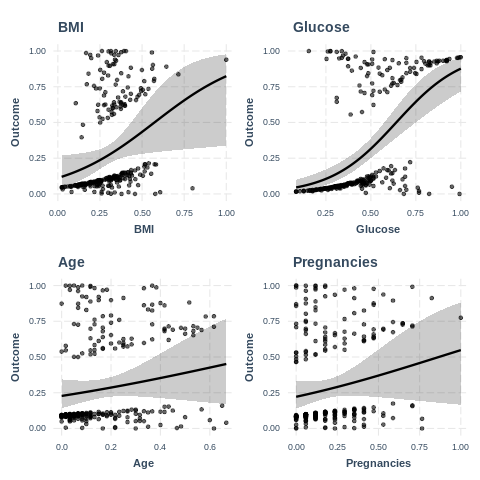

In [ ]:
%%R
p1<-jtools::effect_plot(fit.logit,
                    main.title = "BMI",
                    pred = BMI,
                    interval = TRUE,
                    partial.residuals = TRUE)
p2<-jtools::effect_plot(fit.logit,
                    main.title = "Glucose ",
                    pred = Glucose,
                    interval = TRUE,
                    partial.residuals = TRUE)
p3<-jtools::effect_plot(fit.logit,
                    main.title = "Age",
                    pred = Age ,
                    interval = TRUE,
                    partial.residuals = TRUE)
p4<-jtools::effect_plot(fit.logit,
                    main.title = "Pregnancies",
                    pred = Pregnancies,
                    interval = TRUE,
                    partial.residuals = TRUE)
library(patchwork)
(p1+p2)/(p3 +p4)

### Cross-validation



In [ ]:
%%R
#| warning: false
#| error: false
### Cross-Validation
# Custom cross-validation function
cross_validation_glm_predictions <- function(formula, data, k = 5, family = binomial, seed = 123) {
  set.seed(seed)
  n <- nrow(data)
  folds <- sample(rep(1:k, length.out = n))
  all_probabilities <- numeric(n)

  for (i in 1:k) {
    train_data <- data[folds != i, ]
    test_data <- data[folds == i, ]
    model <- glm(formula = formula, data = train_data, family = family)
    test_probabilities <- predict(model, newdata = test_data, type = "response")
    all_probabilities[folds == i] <- test_probabilities
  }

  return(all_probabilities)
}

# Perform cross-validation
predicted_prob <- cross_validation_glm_predictions(
  formula = Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age,
  data = df, k = 5, family = binomial
)
head(predicted_prob)

[1] 0.03314842 0.90124013 0.03716919 0.80089545 0.89136644 0.69463486


#### Cross-validation Performance

In [ ]:
%%R
## predicted class
predicted_classes<-ifelse(predicted_prob  > 0.5, 1 ,0)
# actual class
actual_classes <- ifelse(df$Outcome == "Yes", 1, 0)
# Calculate True Positives, False Positives, True Negatives, False Negatives
TP <- sum(actual_classes == 1 & predicted_classes == 1)
FP <- sum(actual_classes == 0 & predicted_classes == 1)
TN <- sum(actual_classes == 0 & predicted_classes == 0)
FN <- sum(actual_classes == 1 & predicted_classes == 0)

# Calculate Accuracy
accuracy <- (TP + TN) / (TP + FP + TN + FN)

# Calculate Precision
precision <- TP / (TP + FP)

# Calculate Recall
recall <- TP / (TP + FN)

# Calculate F1 Score
f1_score <- 2 * (precision * recall) / (precision + recall)

# Display results
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

Accuracy: 0.7755102 
Precision: 0.7019231 
Recall: 0.5615385 
F1 Score: 0.6239316 


#### ROC Curve

The ROC analysis can easily be performed using `roc()` function of {pROC} package.

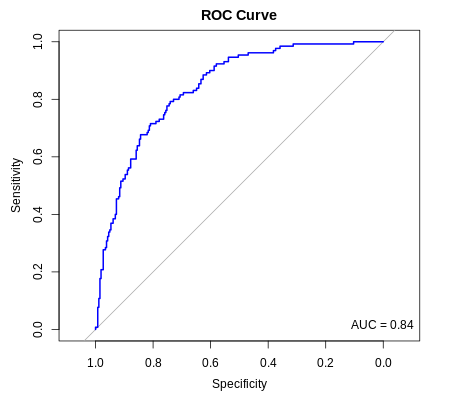

In [ ]:
%%R -w 450 -h 400 -u px

# compute ROC
roc_curve <- roc(actual_classes, predicted_prob )

# Plot the ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue", lwd = 2)

# Add AUC to the plot
auc_value <- auc(roc_curve)
legend("bottomright", legend = paste("AUC =", round(auc_value, 2)), bty = "n")

### Prediction at Test Locations

The `predict()` function for logistic models returns the default predictions of log-odds, which are probabilities on the logit scale. When type = `response`, the function provides the predicted probabilities.



In [ ]:
%%R
test$Pred_prob<-predict(fit.logit, test, type = "response")
# setting the cut-off probability
test$Pred_Class<- ifelse(test$Pred_prob > 0.5,"Yes","No")

#### Confusion Matrix at 50% Cut-Off Probability

Now, we classified an sites in the test data set with a probability of As contamination is greater than 0.5, as `Yes`, otherwise `No`.




In [ ]:
%%R
# Confusion matrix, proportion of cases
confusion_matrix <- table(Actual = test$Outcome, Predicted = test$Pred_Class)
confusion_matrix

      Predicted
Actual No Yes
   No  67  12
   Yes 13  26




#### Prediction Performance

In [ ]:
%%R
 #define variables
    TP <- confusion_matrix[2, 2]
    TN <- confusion_matrix[1, 1]
    FP <- confusion_matrix[2, 1]
    FN <- confusion_matrix[1, 2]

    # accuracy
    accuracy <- (TP + TN) / sum(confusion_matrix)

    # precision
    precision <- TP / (TP + FP)

    # Recall
    recall <- TP / (TP + FN)

    # specificity
    specificity <- TN / (TN + FP)

    # f1_score
    f1_score <- 2 * (precision * recall) / (precision + recall)

    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("Specificity:", specificity, "\n")
    cat("F1 Score:", f1_score, "\n")

Accuracy: 0.7881356 
Precision: 0.6666667 
Recall: 0.6842105 
Specificity: 0.8375 
F1 Score: 0.6753247 


#### ROC Curve


The ROC analysis can be easily performed using `roc()` of {pROC} package.

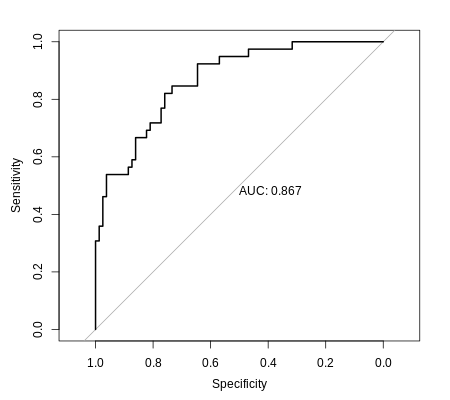

In [ ]:
%%R -w 450 -h 400 -u px
library(pROC)
res.roc <- pROC::roc(test$Outcome, test$Pred_prob)
plot.roc(res.roc, print.auc = TRUE)

On a graph, the gray diagonal line represents a classifier's performance that is no better than random chance. In contrast, a high-performing classifier will exhibit a ROC curve that rises steeply towards the top-left corner. This indicates that it can correctly identify a large number of positives without misclassifying many negatives. The AUC metric is commonly used to evaluate the performance of a classifier. An AUC value close to 1, which is the maximum possible value, is indicative of a highly effective classifier. In this case, our classifier exhibits an AUC value of 0.79, suggesting that it is indeed good. By contrast, a classifier that performs no better than random chance would have an AUC value of 0.5 when assessed using an independent test set that was not used for training the model.

In [ ]:
%%R
# Extract some interesting results
roc.data <-tibble(
  thresholds = res.roc$thresholds,
  sensitivity = res.roc$sensitivities,
  specificity = res.roc$specificities
)
# Get the probability threshold for specificity = 0.5
roc.data  |>
  filter(specificity >= 0.5)

# A tibble: 77 × 3
   thresholds sensitivity specificity
        <dbl>       <dbl>       <dbl>
 1      0.158       0.949       0.506
 2      0.168       0.949       0.519
 3      0.177       0.949       0.532
 4      0.181       0.949       0.544
 5      0.188       0.949       0.557
 6      0.194       0.949       0.570
 7      0.196       0.923       0.570
 8      0.197       0.923       0.582
 9      0.208       0.923       0.595
10      0.230       0.923       0.608
# ℹ 67 more rows
# ℹ Use `print(n = ...)` to see more rows


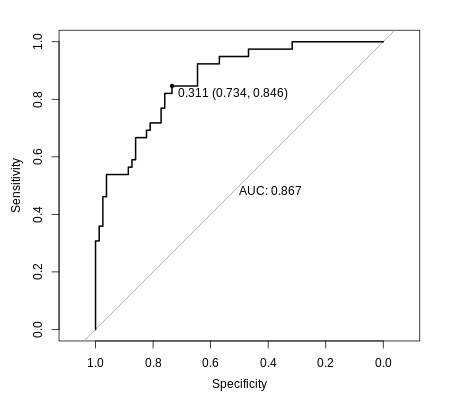

In [ ]:
%%R -w 450 -h 400 -u px
plot.roc(res.roc, print.auc = TRUE, print.thres = "best")

In [ ]:
%%R
rm(list=ls())

## Summary and Conclusion

## Summary and Conclusion

This tutorial provided a comprehensive guide to logistic regression in R, focusing on model building, interpretation, and evaluation. It began by constructing a logistic regression model from scratch, which helped us understand the fundamental calculations involved in the process. We then used the `glm()` function, a convenient and widely-used function in R, to fit a logistic model, demonstrating a more practical application of logistic regression to real datasets. Next, we explored model interpretation, highlighting how to extract and understand coefficients from the `glm()` output. Specifically, the coefficients represent changes in log odds, and transforming them into odds ratios facilitates easier interpretation. This way, we can see the effect size of each predictor on the outcome. The tutorial emphasized the importance of assessing performance through cross-validation and a hold-out test data set for model evaluation. Cross-validation was employed to estimate the model’s predictive accuracy by repeatedly splitting the data into training and validation sets. This helped us evaluate how the model performs on unseen data.

A hold-out test set also provided an unbiased estimate of model performance, ensuring we avoided overfitting the training data. Logistic regression is a powerful and interpretable tool for binary classification problems, and R’s `glm()` function allows for its efficient implementation. Through our hands-on approach, we gained insights into the model’s mechanics by building it from scratch and learned to trust our results through robust evaluation techniques. Understanding model interpretation through log-odds and odds ratios reveals each predictor's influence, making logistic regression especially valuable in fields that require transparent and interpretable models. important factors influencing binary outcomes, and gain insights into the relationships between predictors and outcome probabilities.


## References

1.  [How to Perform Logistic Regression in R](https://www.statology.org/logistic-regression-in-r/)

2.  [Evaluation of Classification Model Accuracy: Essentials](http://www.sthda.com/english/articles/36-classification-methods-essentials/143-evaluation-of-classification-model-accuracy-essentials/)

3.  [Precision, Recall and F1-Score using R](https://www.geeksforgeeks.org/precision-recall-and-f1-score-using-r/)

4.  [Chapter 6 Binary Logistic Regression](https://www.bookdown.org/rwnahhas/RMPH/blr.html)

5.  [Chapter 10 Binary Logistic Regression](https://bookdown.org/chua/ber642_advanced_regression/binary-logistic-regression.html)

6.  R Online Manual: [glm](http://stat.ethz.ch/R-manual/R-patched/library/stats/html/glm.html)

7.  [Applied Logistic Regression (Second Edition)](https://stats.oarc.ucla.edu/examples/alr2/) by David Hosmer and Stanley Lemeshow

8.  [Stat Books for Loan, Logistic Regression and Limited Dependent Variables](https://stats.oarc.ucla.edu/books/#Logistic%20Regression%20and%20Related%20Methods)



